In [39]:
import pandas as pd
import numpy as np
dat = r"C:\Users\steph\Downloads\encoded_df.csv"
df = pd.read_csv(dat)

# Split data

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
headers = list(df.columns)
exc= ['id', 'relDate', 'minute']
print(headers)
headers.remove('id')
headers.remove('relDate')
headers.remove('minute')
ind_var= [x for x in headers if x not in exc]
print(ind_var)
dep_var = ["minute"]
x = df[ind_var]
y = df[dep_var]
x_train, x_test, y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True) 

['id', 'date', 'minute', 'rating', 'relDate', 'relCountry_Argentina', 'relCountry_Australia', 'relCountry_Brazil', 'relCountry_Canada', 'relCountry_China', 'relCountry_Czechia', 'relCountry_Denmark', 'relCountry_France', 'relCountry_Germany', 'relCountry_Greece', 'relCountry_Hong Kong', 'relCountry_India', 'relCountry_Italy', 'relCountry_Japan', 'relCountry_Mexico', 'relCountry_Netherlands', 'relCountry_Philippines', 'relCountry_Poland', 'relCountry_Portugal', 'relCountry_Russian Federation', 'relCountry_South Korea', 'relCountry_Spain', 'relCountry_Sweden', 'relCountry_Switzerland', 'relCountry_Turkey', 'relCountry_UK', 'relCountry_USA', 'type_Digital', 'type_Premiere', 'type_TV', 'type_Theatrical', 'type_Theatrical limited', 'studio_20th Century Fox', 'studio_ARD', 'studio_ARTE', 'studio_ARTE France Cinéma', 'studio_American Mutoscope & Biograph', 'studio_BBC', 'studio_BFI', 'studio_BR', 'studio_CNC', 'studio_Canal+', 'studio_Channel 4 Television', 'studio_Columbia Pictures', 'studio

## Initial Linear Regression Model

In [41]:

model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)
pred = model.predict(x_test)
print(pred)
df_test =x_test
df_test["predictions_linear"]=pred
df_test["actual"]= y_test["minute"]
print(x_test['predictions_linear'])


Coefficients: [[ 2.21078682e-01  8.16431020e+00  1.08076919e+00 -7.22421861e-01
  -3.30770122e-01 -4.30698711e-01  4.23249548e+00 -1.29650918e+00
   1.89681104e+00  3.39549896e+00  4.13933119e+00  9.65457930e-01
   1.40506419e+00  4.70821152e+00  3.62227155e-01  4.06717155e-01
  -4.23158845e-02  4.11932838e-01 -2.50773517e+00 -9.79262090e-02
   2.20758711e+00 -9.65552732e-01  3.35945567e+00  1.09875702e-01
   6.74324990e-01 -2.41206543e+00 -2.28673104e+00  3.53348585e+00
   1.20527420e+00 -1.66566148e+00  8.05372358e-01  2.44614833e+00
   1.10955209e+01  1.62560701e+00  3.93100901e+00  3.98431875e+00
  -1.10682216e+00 -2.65225318e+00 -6.18287151e+01  3.63329592e+00
  -1.13529788e+01  2.41431380e-01 -2.13171876e+00  1.32052748e+00
  -6.83699278e+00  1.54325666e+00 -1.45862411e+01 -3.86226406e+00
  -2.26689286e+00 -2.28917529e+00 -1.34575524e+00  5.20492132e+00
   4.05243394e+00 -6.36147344e+00  4.80174103e+00  5.47618873e+00
   2.08052948e+01 -4.82306691e+00 -3.63646261e+01 -3.70204759e

# Continuous Metrics

In [42]:
def mse(actual,predicted):
    return np.mean((df_test[actual]-df_test[predicted])**2)
    

In [43]:
print(mse("actual" ,"predictions_linear"))

570.4678965751734


In [44]:
def mae(actual,predicted):
    return (abs(df_test[actual]-df_test[predicted])).mean()
    

In [45]:
print(mae("actual","predictions_linear"))

15.362847671136992


# Graphs

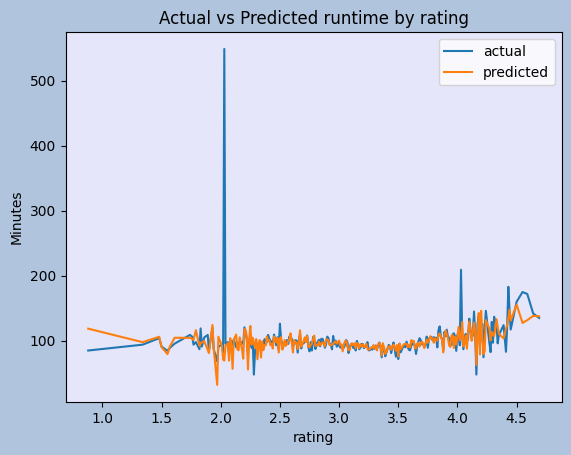

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'rating', y ='actual', label = 'actual', errorbar=('ci', 0))
sns.lineplot(data =df_test, x = 'rating', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by rating")
ax.set(ylabel="Minutes")
plt.show()

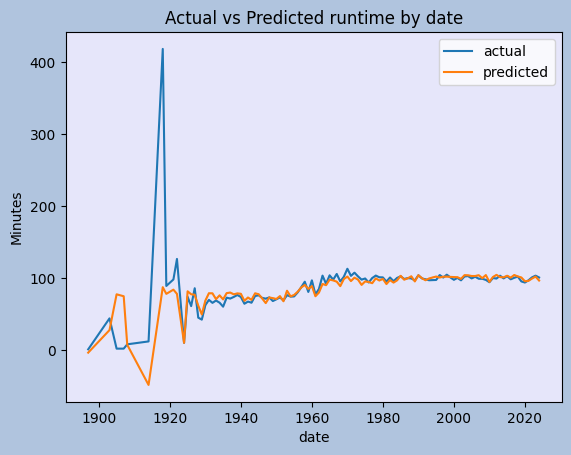

In [47]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'date', y ='actual', label = 'actual', errorbar=('ci', 0))
sns.lineplot(data =df_test, x = 'date', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by date")
ax.set(ylabel="Minutes")
plt.show()

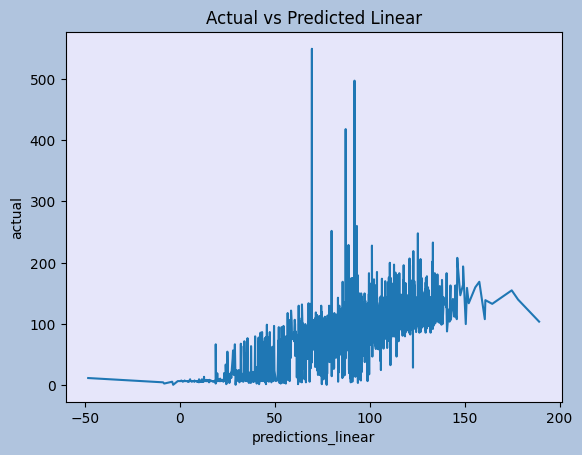

In [48]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
plt.title("Actual vs Predicted Linear")
sns.lineplot(data =df_test, x = 'predictions_linear', y ='actual', errorbar=('ci', 0))
plt.show()

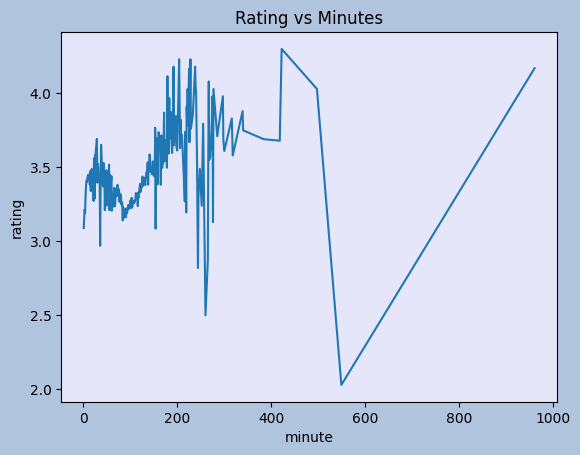

In [49]:

plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df, x = 'minute', y ='rating',errorbar=('ci', 0))
plt.title("Rating vs Minutes")
plt.show()


# Commented Out
### code was not effective at reducing mse or mae so ultimatley not included, but was considered to improve model.
coefficient =[ ] <br>
x=0 <br>
for y in model.coef_: <br>
 >   for co in y: <br>
> >        coefficient.append(co) <br>
> >      x+=1 <br>
r=[ ] <br>
for x in range(len(headers)): <br>
>   print(str(headers[x])+':'+str(coefficient[x]))<br>
>    if coefficient[x]<0.5: <br>
> >        r.append(headers[x]) <br>
ind_var = [x for x in headers if x not in r] <br>
ind_var.append('date') <br>
print(ind_var) <br>
print(len(ind_var)) <br>


# Clean Outliers

In [50]:
from scipy import stats
curr_header = list(df.columns)
print(curr_header)
df = df[np.abs(stats.zscore(df['minute'])) < 3]


['id', 'date', 'minute', 'rating', 'relDate', 'relCountry_Argentina', 'relCountry_Australia', 'relCountry_Brazil', 'relCountry_Canada', 'relCountry_China', 'relCountry_Czechia', 'relCountry_Denmark', 'relCountry_France', 'relCountry_Germany', 'relCountry_Greece', 'relCountry_Hong Kong', 'relCountry_India', 'relCountry_Italy', 'relCountry_Japan', 'relCountry_Mexico', 'relCountry_Netherlands', 'relCountry_Philippines', 'relCountry_Poland', 'relCountry_Portugal', 'relCountry_Russian Federation', 'relCountry_South Korea', 'relCountry_Spain', 'relCountry_Sweden', 'relCountry_Switzerland', 'relCountry_Turkey', 'relCountry_UK', 'relCountry_USA', 'type_Digital', 'type_Premiere', 'type_TV', 'type_Theatrical', 'type_Theatrical limited', 'studio_20th Century Fox', 'studio_ARD', 'studio_ARTE', 'studio_ARTE France Cinéma', 'studio_American Mutoscope & Biograph', 'studio_BBC', 'studio_BFI', 'studio_BR', 'studio_CNC', 'studio_Canal+', 'studio_Channel 4 Television', 'studio_Columbia Pictures', 'studio

In [51]:
x = df[ind_var]
y = df[dep_var]
x_train, x_test, y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True) 

# Improved Linear Regression Model

In [52]:
model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)
pred = model.predict(x_test)
print(pred)
df_test =x_test
df_test["predictions_linear"]=pred
df_test["actual"]= y_test["minute"]
print(x_test['predictions_linear'])

Coefficients: [[ 2.30668845e-01  6.55046474e+00 -4.02586379e-01 -9.33644481e-01
   1.52450938e+00 -6.59838383e-01  3.71322416e+00 -1.05032303e-01
   1.54159381e+00  2.68030586e+00  4.23605735e+00  8.26271415e-02
   2.12501315e+00  2.82011598e+00  6.96951740e-01  1.65862927e+00
   6.31731822e-01  2.59527074e-01 -1.96775305e+00 -7.48961501e-01
   1.70729238e+00 -6.82973149e-01  3.47991836e+00  9.29337532e-01
   7.97230476e-01 -2.55849021e+00 -2.79596490e+00  2.89454418e+00
   2.18173038e+00 -1.88751518e+00  1.50891772e+00  1.84618549e+00
   1.07871536e+01  8.02517303e-01  3.57158374e+00  3.43562625e+00
  -3.00316880e+00 -1.29816229e+00 -6.17170964e+01 -6.36396447e-01
  -1.06844001e+01  3.93661609e+00 -7.51990111e-01 -5.37311592e-01
  -1.39907678e+01  9.89154103e-01 -2.99284312e+00  9.45297903e-01
  -3.35090542e+00  1.05151231e+01  8.14617676e-01  4.50562162e+00
   3.30659034e+00 -3.00489913e+00  7.33024134e+00  1.14922188e+00
   2.97874720e+00 -5.30750857e+00 -3.38204890e+01 -3.34229834e

In [53]:
print(mse("actual" ,"predictions_linear"))

426.0887961688346


In [54]:
print(mae("actual","predictions_linear"))

14.881894715548514


# Improved Graphs

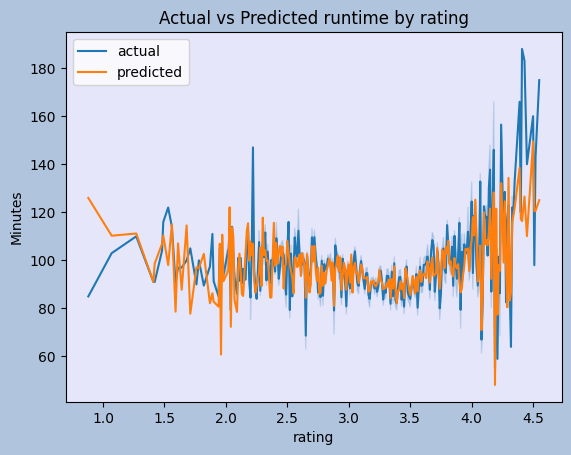

In [55]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'rating', y ='actual', label = 'actual', errorbar=('ci', 40))
sns.lineplot(data =df_test, x = 'rating', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by rating")
ax.set(ylabel="Minutes")
plt.show()

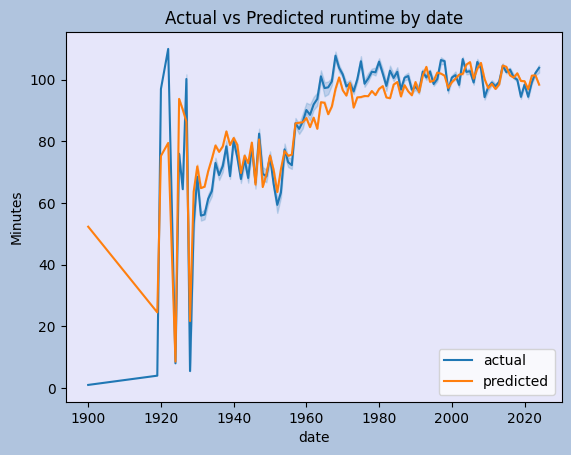

In [56]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'date', y ='actual', label = 'actual', errorbar=('ci', 20))
sns.lineplot(data =df_test, x = 'date', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by date")
ax.set(ylabel="Minutes")
plt.show()

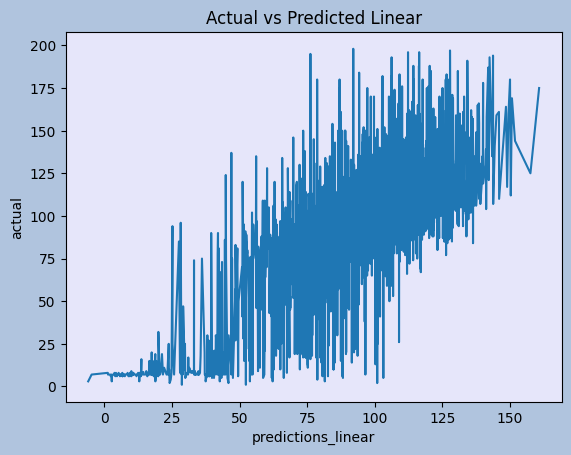

In [57]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
plt.title("Actual vs Predicted Linear")
sns.lineplot(data =df_test, x = 'predictions_linear', y ='actual', errorbar=('ci', 0))
plt.show()